In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Step 5: Data cleaning

Some points to keep in mind: 

- [ ] Find missing values. 
- [ ] Find NaN and 0 values. 
- [ ] Do all columns have the same dtypes?
- [ ] Convert dates to datetime types.
    - [ ] You can use the python package arrow or datetime.
- [ ] Convert categorical variables to type 'category' if working with pandas. 
- [ ] Convert strings to ints or floats if they represent numbers.
- [ ] Standardize strings
    - [ ] Convert them to lower case if possible.
    - [ ] Replace spaces with underscores or dashes.
    - [ ] Remove white spaces around the string **this is very critical**.
    - [ ] Check of inconsistent spellings *typically done manually*.
- [ ] Look for duplicate rows or columns.
- [ ] Look for preprocessed columns; example: A categorical column that has been duplicated 
    with categorical labels.
    
A list of data cleaning libraries: https://mode.com/blog/python-data-cleaning-libraries/ 

In [69]:
df=pd.read_csv("../../data/external/dataset.csv")
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

### Dropping Columns
- CLIENTNUM is a unique identifier for each row and will not be used
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 & Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 are classifier columns derived either from the bank's internal team or from the original poster of the dataset

In [72]:
df = df.drop(["CLIENTNUM", 
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
             ], axis=1)

### Null Values

In [4]:
df.isnull().sum(axis=0)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

- There are no null values in entire dataframe

In [6]:
df.isnull().sum(axis=0)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.shape

(10127, 20)

Rows: 10,127
Columns: 20
    - Character: 6
    - Numeric: 14
 

In [70]:
df.replace(['Existing Customer','Attrited Customer'],[1,0],inplace=True)
df.head()

CLIENTNUM  Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383               1            45      M                3   
1  818770008               1            49      F                5   
2  713982108               1            51      M                3   
3  769911858               1            40      F                4   
4  709106358               1            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [73]:
# One hot encoding for categorical variables - convert categorical to numeric
df_cc_encoded = pd.get_dummies(df)
df_cc_encoded.head()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               1            45                3              39   
1               1            49                5              44   
2               1            51                3              36   
3               1            40                4              34   
4               1            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0                  777          11914.0  ...   
1        8256.0                  864           7392.0  ...   
2        3418.0                    0           3418.0  ...   
3        3313.0                 2517            796.0  ...   
4        4716.0                    0           4716.0  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 38 columns]

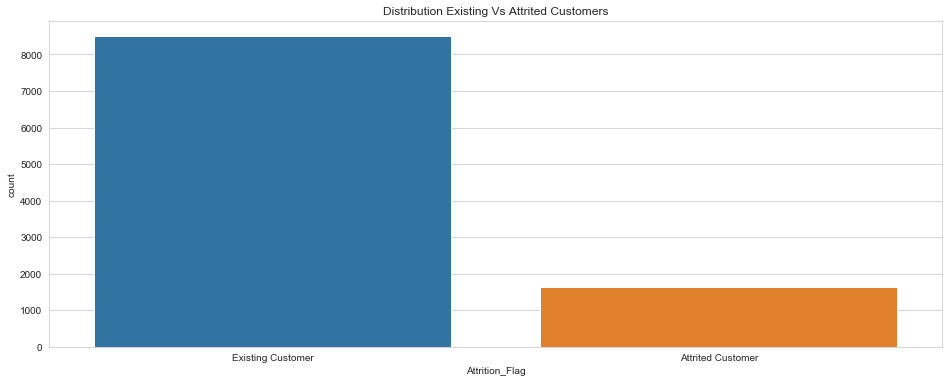

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
plt.title("Distribution Existing Vs Attrited Customers")
sns.countplot(x=df['Attrition_Flag'])

- dataset is imbalanced
- how do we show percentages here?

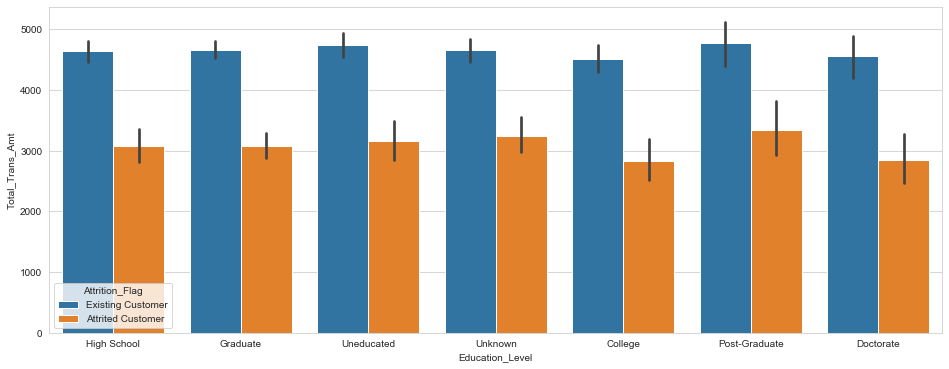

In [9]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Education_Level", y="Total_Trans_Amt", hue='Attrition_Flag', data=df)

Education Level did not affect Transaction amount and Attrition.

In [10]:
fig=go.Figure()
fig.add_trace(go.Histogram(x=df.loc[df['Attrition_Flag']=='Existing Customer']['Education_Level'],
                           histnorm='probability density',marker=dict(color='crimson'),
                           opacity=0.75,name='Education level of existing customers'))
fig.add_trace(go.Histogram(x=df.loc[df['Attrition_Flag']=='Attrited Customer']['Education_Level'],
                           histnorm='probability density',marker=dict(color='dodgerblue'),
                           opacity=0.75,name='Education level of churned customers'))
fig.update_layout(title='Education level',legend=dict(x=0.5,xanchor='center',orientation='h'),margin=dict(l=0,r=0,t=30,b=0))
fig.show()

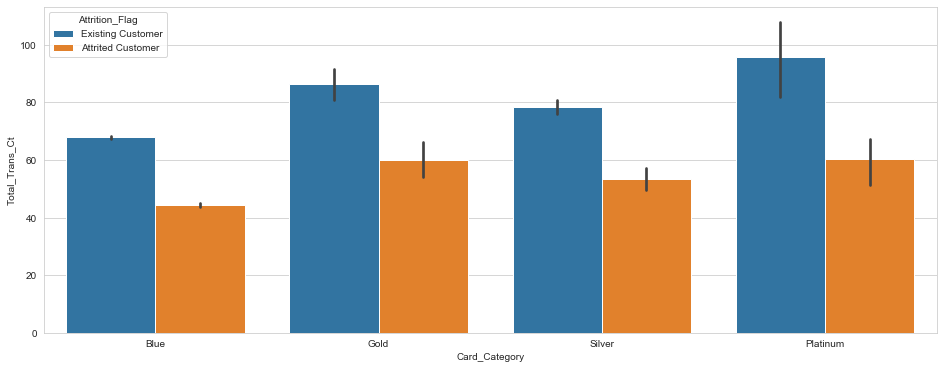

In [46]:
# sns.set(rc={'figure.figsize':(15,7)})
plt.figure(figsize=(16, 6))
sns.barplot(x="Card_Category", y="Total_Trans_Ct", hue='Attrition_Flag', data=df)

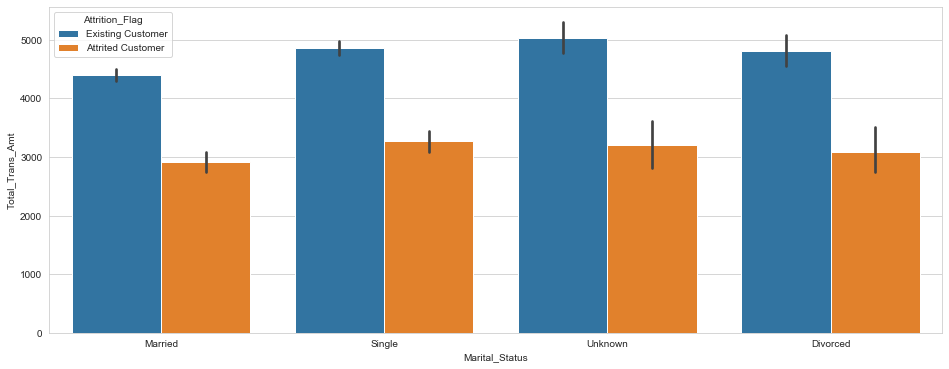

In [12]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Marital_Status", y="Total_Trans_Amt", hue='Attrition_Flag', data=df)

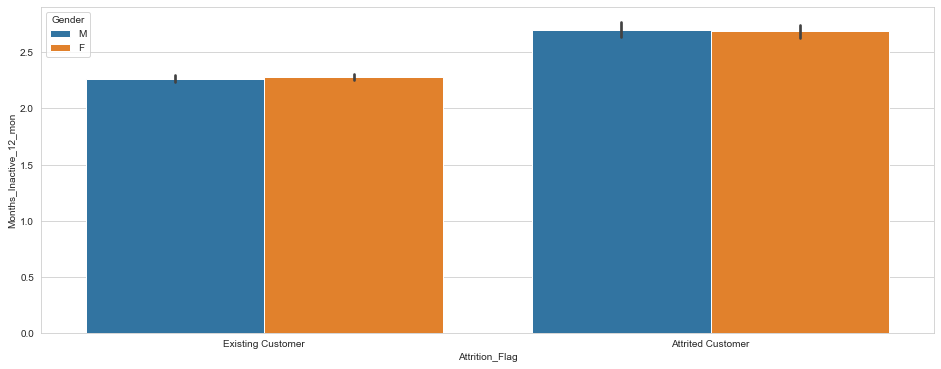

In [13]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Attrition_Flag", y="Months_Inactive_12_mon", hue='Gender', data=df)

In [14]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

# Pairplots

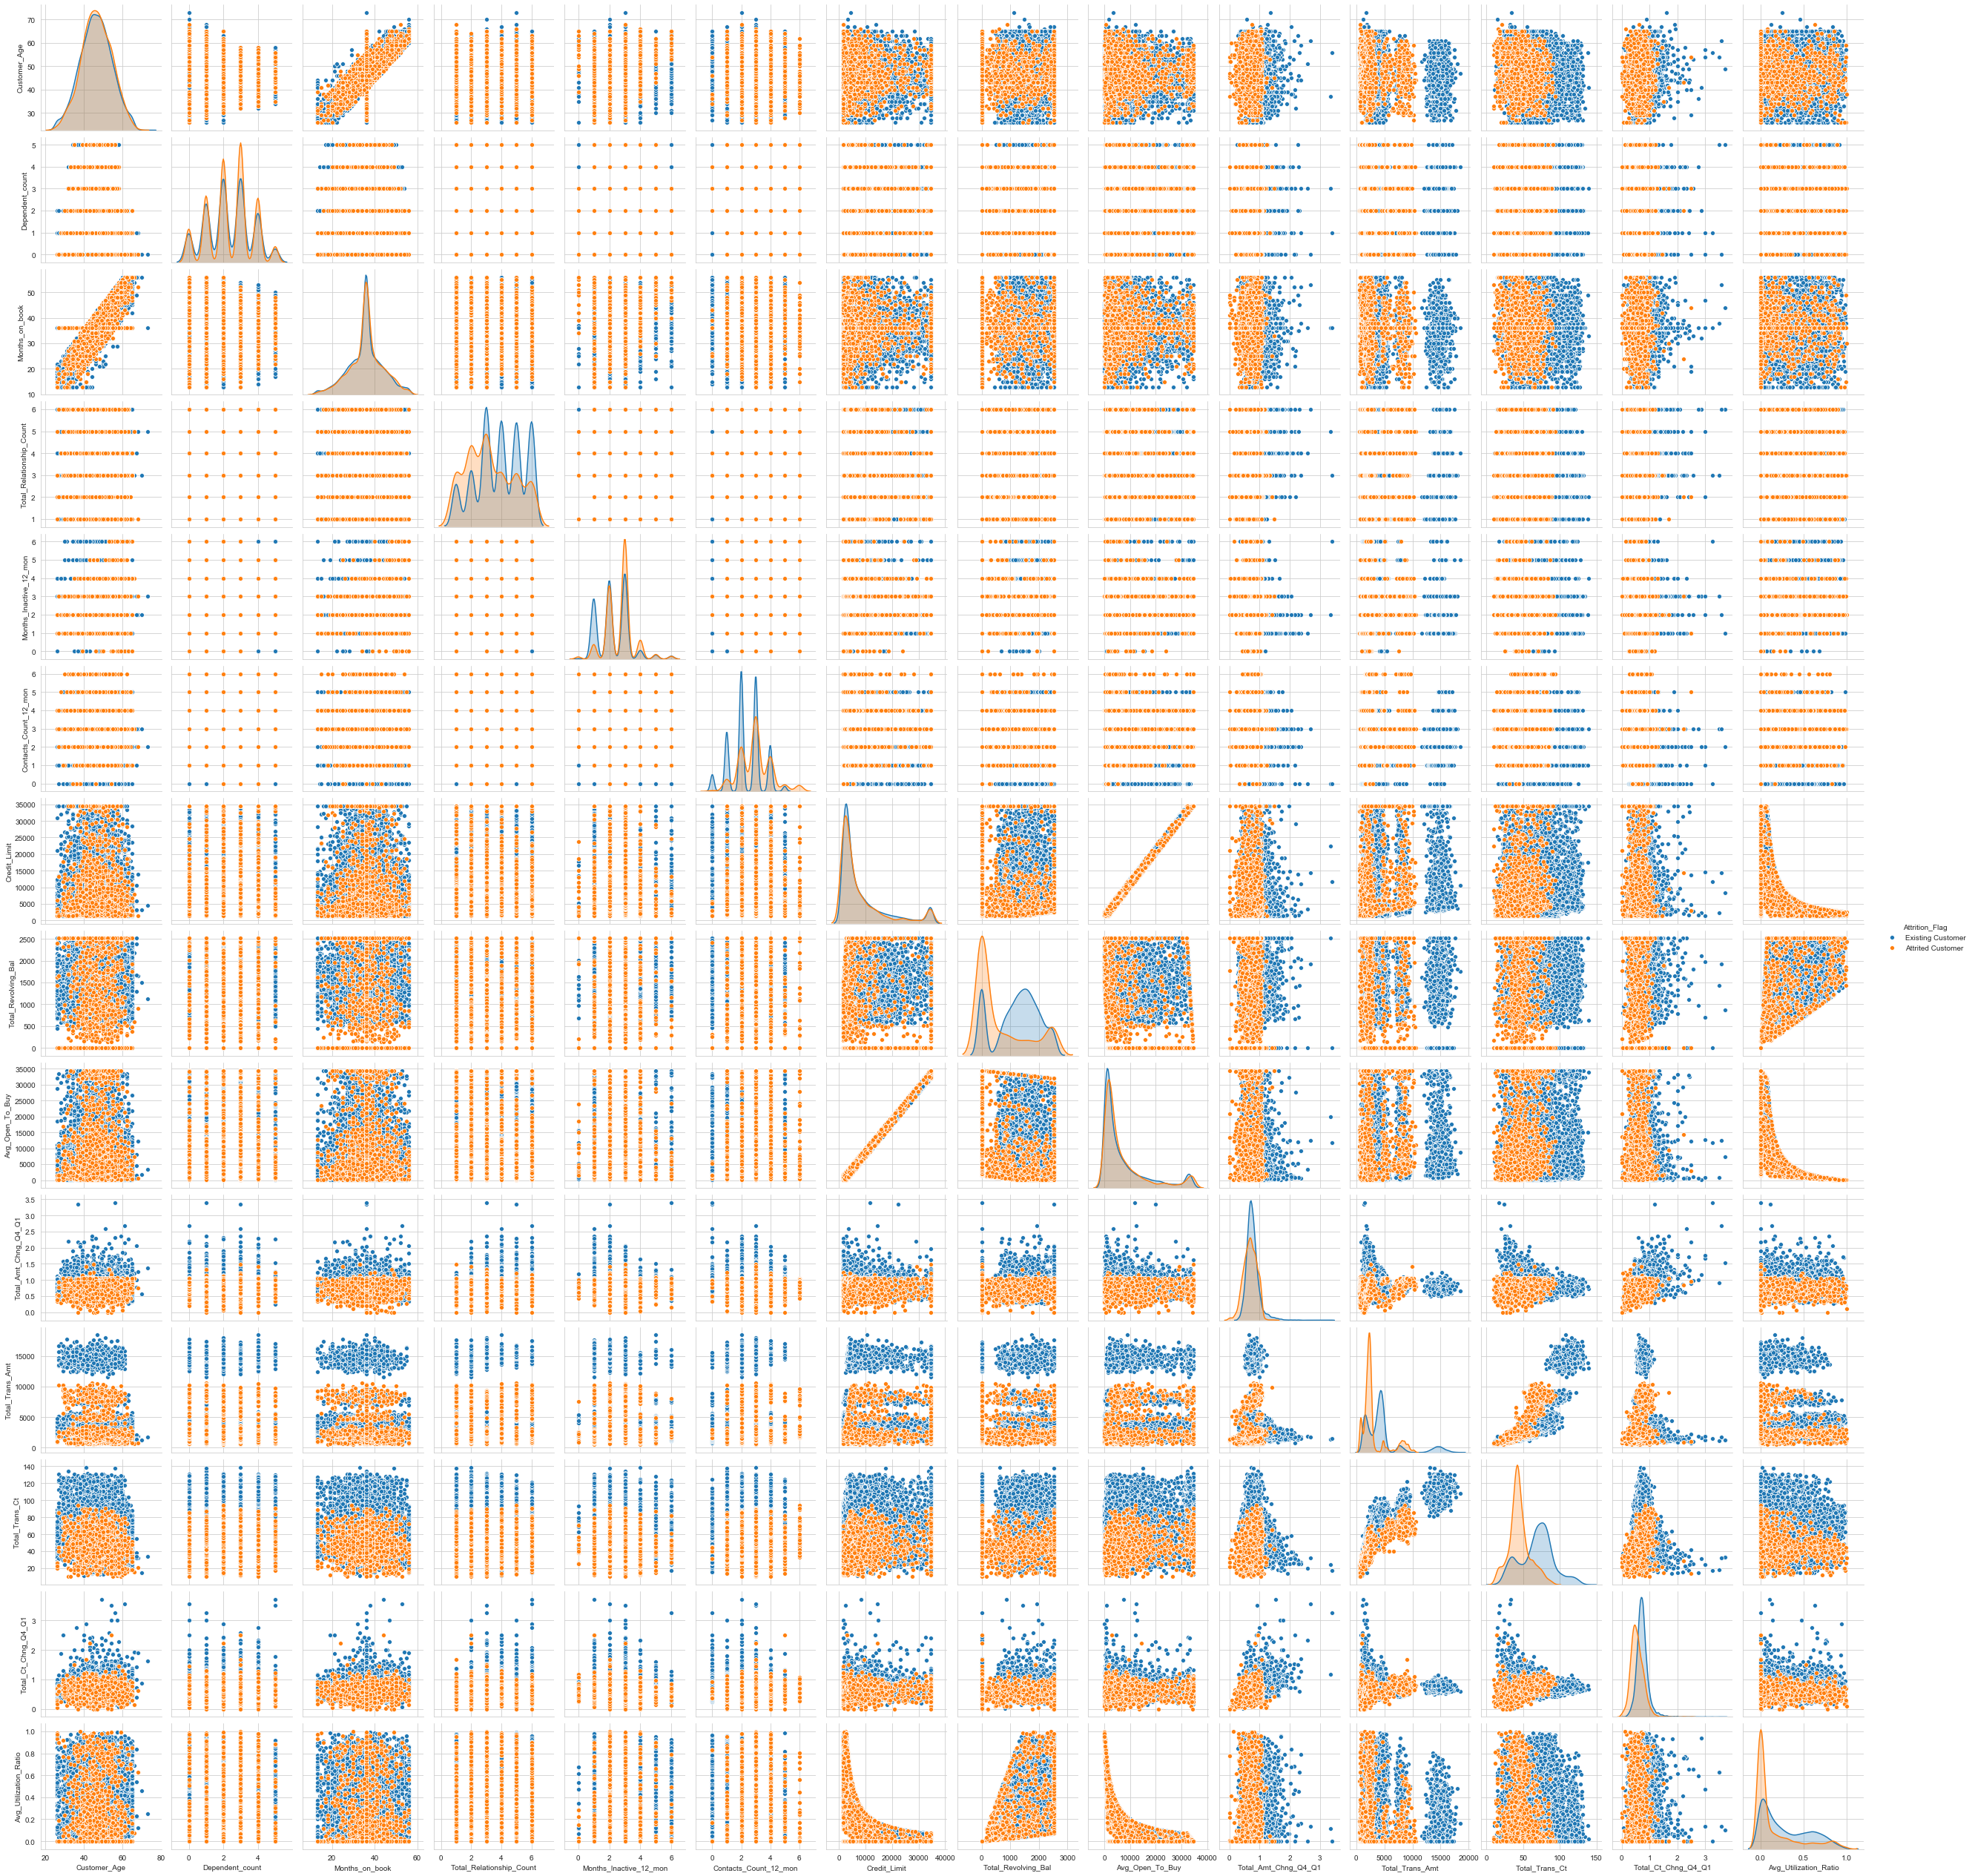

In [15]:
sns.pairplot(df, hue = 'Attrition_Flag')

In [21]:
# sns.displot(data=df, x='Total_Trans_Amt', hue='Attrition_Flag')
# plt.title('Total Transaction Amount Existing Vs Attrited',fontsize=15);

AttributeError: module 'seaborn' has no attribute 'displot'

In [20]:
!pip install seaborn

Total transaction amt for attrited customers peaked at 2500 vs existing at 5000.

In [2]:
sns.displot(data=df, x='Total_Trans_Ct', hue='Attrition_Flag')
plt.title('Total Transaction Count Existing Vs Attrited',fontsize=15);

AttributeError: module 'seaborn' has no attribute 'displot'

Total transaction count for attrited customers peaked at around 40 transactions, existing customers transaction ct is double that peaking at 80 transactions.

In [ ]:
sns.displot(data=df, x='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.title('Average Utilization Ratio Existing Vs Attrited',fontsize=15);

In [ ]:
sns.displot(data=df, x='Total_Revolving_Bal', hue='Attrition_Flag')
plt.title('Total Revolving Balance Existing Vs Attrited',fontsize=15);

Majority of attrited customers do not utilize their credit cards, as seen above in both plots.

# Outliers

In [ ]:
df.describe()

Describe results above show that most columns have acceptable anomaly range, and there is no erroneous data captured such unnaturally high customer age. If you compare mean and median (50%) values, the larger the values the more likelihood of outliers in those features. For example, credit limit mean is \\$8631.95 while the median is $4549. This could indicate there are outliers due to wide discrepancy.
Avg_Open_To_Buy - could be the amount of credit available to use at a given time & Avg_Utilization_Ratio. This also has a wide discrepancy but that may be normal. We will plot to confirm.

### Interquartile Range (IQR) is a measure of statistical dispersion

IQR is the 1st quartile subtracted from the 3rd quartile.

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Customer_Age                  11.000
Dependent_count                2.000
Months_on_book                 9.000
Total_Relationship_Count       2.000
Months_Inactive_12_mon         1.000
Contacts_Count_12_mon          1.000
Credit_Limit                8512.500
Total_Revolving_Bal         1425.000
Avg_Open_To_Buy             8534.500
Total_Amt_Chng_Q4_Q1           0.228
Total_Trans_Amt             2585.500
Total_Trans_Ct                36.000
Total_Ct_Chng_Q4_Q1            0.236
Avg_Utilization_Ratio          0.480
dtype: float64


In [23]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

       Attrition_Flag  Avg_Open_To_Buy  Avg_Utilization_Ratio  Card_Category  \
0               False            False                  False          False   
1               False            False                  False          False   
2               False            False                  False          False   
3               False            False                  False          False   
4               False            False                  False          False   
...               ...              ...                    ...            ...   
10122           False            False                  False          False   
10123           False            False                  False          False   
10124           False            False                  False          False   
10125           False            False                  False          False   
10126           False            False                  False          False   

       Contacts_Count_12_mon  Credit_Li

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

The output above shows true / false values for all datapoints, where false means the value is valid but true indicates presence of an outlier.

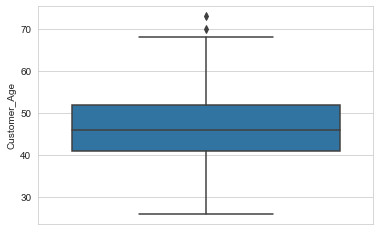

In [24]:
sns.boxplot(y='Customer_Age', hue='Attrition_Flag', data=df)

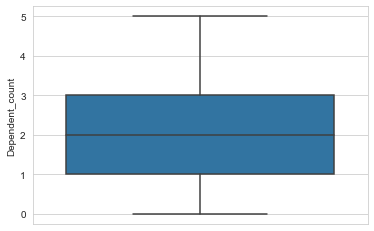

In [25]:
sns.boxplot(y='Dependent_count', hue='Attrition_Flag', data=df)

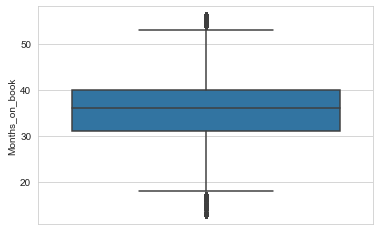

In [26]:
sns.boxplot(y='Months_on_book', hue='Attrition_Flag', data=df)

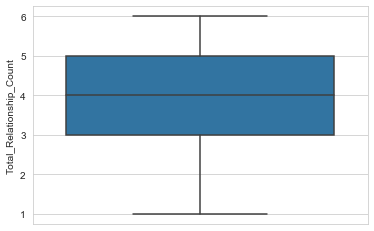

In [27]:
sns.boxplot(y='Total_Relationship_Count', hue='Attrition_Flag', data=df)

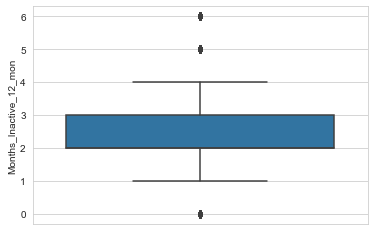

In [28]:
sns.boxplot(y='Months_Inactive_12_mon', hue='Attrition_Flag', data=df)

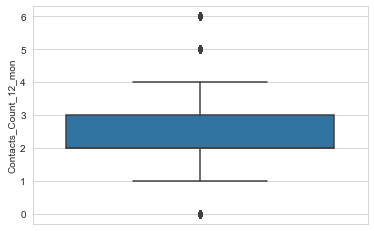

In [29]:
sns.boxplot(y='Contacts_Count_12_mon', hue='Attrition_Flag', data=df)

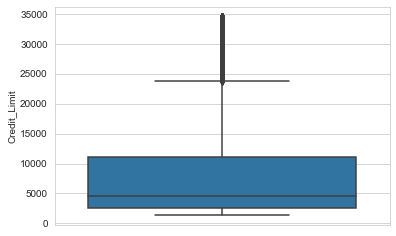

In [30]:
sns.boxplot(y='Credit_Limit', hue='Attrition_Flag', data=df)

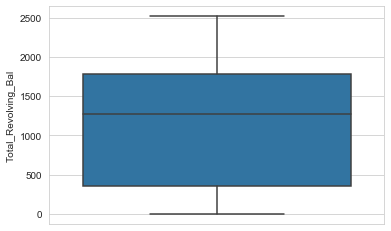

In [31]:
sns.boxplot(y='Total_Revolving_Bal', hue='Attrition_Flag', data=df)

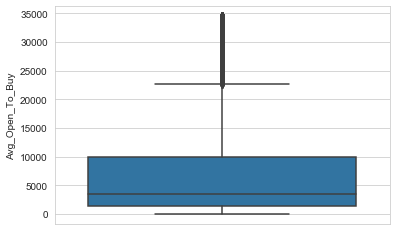

In [32]:
sns.boxplot(y='Avg_Open_To_Buy', hue='Attrition_Flag', data=df)

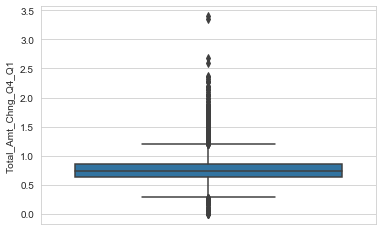

In [33]:
sns.boxplot(y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', data=df)

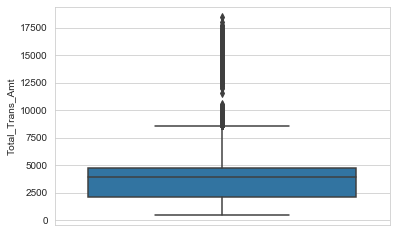

In [34]:
sns.boxplot(y='Total_Trans_Amt', hue='Attrition_Flag', data=df)

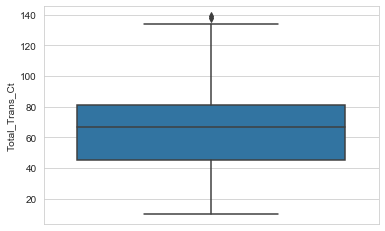

In [35]:
sns.boxplot(y='Total_Trans_Ct', hue='Attrition_Flag', data=df)

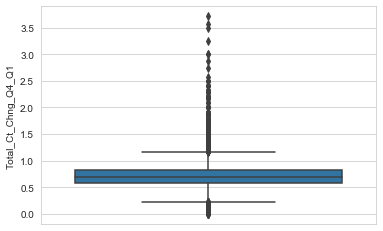

In [36]:
sns.boxplot(y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', data=df)

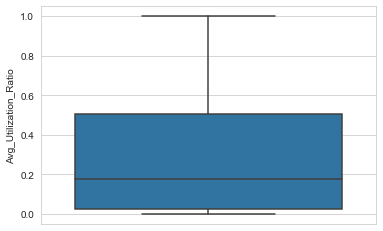

In [37]:
sns.boxplot(y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=df)

### Correcting and Removing Outliers

In [45]:
df_without_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_without_outliers

Attrition_Flag  Customer_Age Gender  Dependent_count  \
10     Existing Customer            42      M                5   
14     Existing Customer            57      F                2   
19     Existing Customer            45      F                2   
21     Attrited Customer            62      F                0   
23     Existing Customer            47      F                4   
...                  ...           ...    ...              ...   
10048  Attrited Customer            48      M                4   
10052  Attrited Customer            31      M                1   
10067  Attrited Customer            49      F                4   
10089  Attrited Customer            52      F                5   
10125  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10         Uneducated        Unknown         $120K +          Blue   
14           Graduate        Married  Less than $40K          Blue   
19           Graduate        Married         Unknown          Blue   
21           Graduate        Married  Less than $40K          Blue   
23            Unknown         Single  Less than $40K          Blue   
...               ...            ...             ...           ...   
10048         College        Married    $80K - $120K          Blue   
10052   Post-Graduate         Single     $40K - $60K          Blue   
10067      Uneducated        Married     $40K - $60K          Blue   
10089         Unknown        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10                 31                         5                       3   
14                 48                         5                       2   
19                 37                         6                       1   
21                 49                         2                       3   
23                 36                         3                       3   
...               ...                       ...                     ...   
10048              44                         2                       3   
10052              24                         4                       2   
10067              36                         5                       2   
10089              36                         4                       3   
10125              36                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10                         2        6748.0                 1467   
14                         2        2436.0                  680   
19                         2       14470.0                 1157   
21                         3        1438.3                    0   
23                         2        2492.0                 1560   
...                      ...           ...                  ...   
10048                      3        9524.0                 1449   
10052                      4        4169.0                  534   
10067                      3        4167.0                    0   
10089                      3        9611.0                    0   
10125                      3        5281.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10              5281.0                 0.831             1201              42   
14              1756.0                 1.190             1570              29   
19             13313.0                 0.966             1207              21   
21              1438.3                 1.047              692              16   
23               932.0                 0.573             1126              23   
...                ...                   ...              ...             ...   
10048           8075.0                 0.559             7527              58   
10052           3635.0

In [39]:
print(df.shape)
print(df_without_outliers.shape)

(10127, 20)
(6802, 20)


## Imbalance in the Target Variable

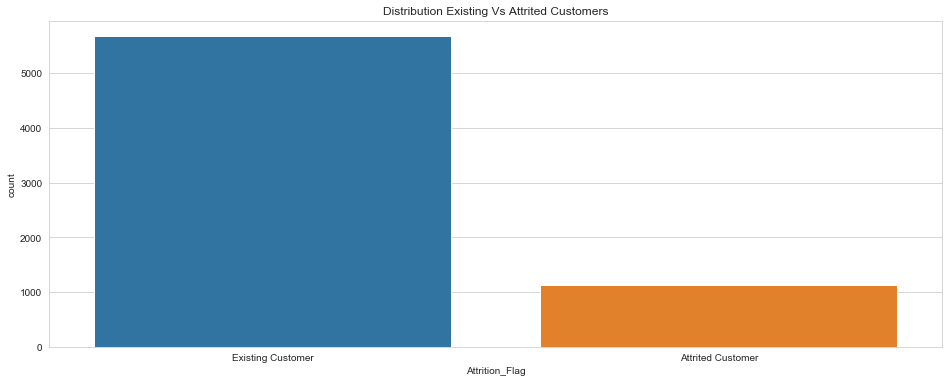

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
plt.title("Distribution Existing Vs Attrited Customers")
sns.countplot(x=df_without_outliers['Attrition_Flag'])

Existing customers account for 83% (8500 records) of the data, while 17% (1627 records) is attrited customers. If we use this data ratio to train our model then the model will be biased towards existing customers.
To deal with this we will use an over sampling technique called SMOTE. Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The new instances are not just copies of existing rows, the algorithm takes samples of the feature space for each target class and its nearest neighbors. The algorithm then generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.
SMOTE is not guaranteed to produce more accurate models. We will try pipelining with different percentages, different feature sets, and different numbers of nearest neighbors to see how adding cases influences our model.

In [74]:
# Divide our dataset into feature and target set
x = df_cc_encoded.drop('Attrition_Flag',axis=1) # Feature set
x.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   
3                 2517            796.0                 1.405  ...   
4                    0           4716.0                 2.175  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 37 columns]

In [47]:
#getting dummy variables for object type data
obj_list=x.select_dtypes(include='object')
float_list=x.select_dtypes(exclude='object')
obj_list=pd.get_dummies(obj_list)
x=pd.concat([obj_list,float_list],axis=1)

In [75]:
y = df_cc_encoded['Attrition_Flag']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int64

In [78]:
smote = SMOTE(random_state=60)
x_smote, y_smote = smote.fit_resample(x,y)

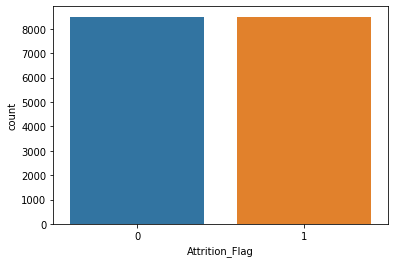

In [79]:
sns.countplot(y_smote)

After oversampling with SMOTE, the data is now balanced and we can proceed to training the model.

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Logistic Regression

In [81]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
prediction_lr = logistic.predict(x_test)
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.68      0.36      0.47       384
           1       0.89      0.97      0.93      2148

    accuracy                           0.88      2532
   macro avg       0.79      0.67      0.70      2532
weighted avg       0.86      0.88      0.86      2532



C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Feature Importance

In [84]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x, y)

pd.Series(clf.feature_importances_, index=x.columns[:]).plot.bar(color='steelblue', figsize=(12, 6)

SyntaxError: unexpected EOF while parsing (<ipython-input-84-81ceb03b3b75>, line 6)